In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# from catboost import CatBoostRegressor, Pool

In [152]:
all_data = pd.read_csv('./data/final_2022.csv') # ПЕРВАЯ ВЕРСИЯ ДАННЫХ

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35371 entries, 0 to 35370
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dt       35371 non-null  object
 1   nomer    35371 non-null  object
 2   age      35371 non-null  object
 3   reson    35371 non-null  object
 4   address  35371 non-null  object
 5   porod    35371 non-null  object
 6   type     35371 non-null  object
 7   type.1   35371 non-null  object
 8   diag     35371 non-null  object
 9   result   35371 non-null  object
 10  move     35371 non-null  object
 11  base     35371 non-null  object
 12  first    35371 non-null  object
 13  last     35371 non-null  object
dtypes: object(14)
memory usage: 3.8+ MB


In [140]:
all_data.head(20)

,dt,nomer,age,reson,address,porod,type,type.1,diag,result,move,base,first,last
0,2020-01-01 00,16(16),68 лет,"больной или пострадавший,","""г.Нижний Новгород, ш. Казанское, д.9, кв***"",",Болит живот (взрослый),Первичный,неотложное состояние,Люмбалгия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,10:56,10:58
1,2020-01-01 00,29(29),79 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Богдановича, д.1, кв.*...",Болит живот (взрослый),Первичный,неотложное состояние,Гастрит,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,13:54,14:08
2,2020-01-01 00,52(52),11 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Героя Быкова, д.9, к***"",","""Температура 38-39","других жалоб нет""",Первичный,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"""ГБУЗ НО """"Детская городская поликлиника №48""""...",ПСМП №7,17:34,17:45
3,2020-01-02 00,113(113),83 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Родионова, д.165, корп...",Задыхается (нарушение сердечного ритма),Первичный,внезапное заболевание,Гипертоническая болезнь,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Тур...",ПСМП №7,06:52,07:07
4,2020-01-04 00,368(109),81 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Надежды Сусловой, д.3,...","""Боль в груди (колющая",Вызов,Вид,Дисциркуляторная энцефалопатия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №30"""" (ул. Ад...",ПСМП №7,03:08,03:23
5,2020-01-05 00,588(89),75 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Максима Горького, д.80...",Аритмия,Первичный,неотложное состояние,Пароксизм фибрилляции предсердий.,отказ от транспортировки для госпитализации в ...,"""ГБУЗ НО """"Городская клиническая больница №38""...",ПСМП №7,21:00,21:14
6,2020-01-05 00,557(58),24 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Германа Лопатина, д.8,...","""Температура",Вызов,Вид,ОРВИ. Гипертермический синдром,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,16:56,17:05
7,2020-01-05 00,537(38),11 лет,"больной или пострадавший,","""г.Нижний Новгород, ул. Ванеева, д.102, кв***"",","""Аллергия",Вызов,Вид,Аллергия неуточненная,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Детская городская поликлиника №48""""...",ПСМП №7,14:01,14:13
8,2020-01-06 00,723(98),64 лет,"сотрудник МЧС (пожарной охраны),","""г.Нижний Новгород, ул. Верхне-Печерская, д.11...",Субфебрильная температура без дополнительных ...,Первичный,неотложное состояние,Дисциркуляторная энцефалопатия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,22:20,22:30
9,2020-01-07 00,759(2),37 лет,"больной или пострадавший,","""г.Нижний Новгород, б-р. 60-летия Октября, д.4...","""Боль в груди",Вызов,Вид,ОРВИ. Гипертермический синдром,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №30"""" (ул. Ад...",ПСМП №7,08:59,09:15


In [21]:
# all_data[all_data.nomer == "92(92)"]

,dt,nomer,age,reson,address,porod,type,type.1,diag,result,move,base,first,last
10253,2021-01-01 00,92(92),36 лет,"больной или пострадавший,","""г.Нижний Новгород, ш. Московское, д.405"",",Аритмия,Первичный,неотложное состояние,Дистония неуточненная,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская клиническая больница №39""...",ПСМП №4,09:27,09:40


In [153]:
all_data['dt'] = pd.to_datetime(all_data['dt'])

all_data['nomer1'] = pd.to_numeric(all_data['nomer'].str.split('(').str[0], errors='coerce')
all_data['nomer2'] = pd.to_numeric(all_data['nomer'].str.split('(').str[1].str.replace(')', ''), errors='coerce')
all_data['age'] = pd.to_numeric(all_data['age'].str.split().str[0], errors='coerce')

all_data['first'] = pd.to_datetime(all_data['first'], errors='coerce')
all_data['last'] = pd.to_datetime(all_data['last'], errors='coerce')
all_data['time_exp'] =  all_data['last'] - all_data['first']
all_data['hour'] = all_data['first'].dt.hour

all_data['first'] = pd.to_datetime(all_data['first'],format= '%H:%M:%S' ).dt.time
all_data['last'] = pd.to_datetime(all_data['last'],format= '%H:%M:%S' ).dt.time

all_data['address1'] = all_data['address'].str.split('.').str[0].str.replace('"','') # locality type
all_data['address2'] = all_data['address'].str.split('.').str[1].str.split(' ').str[0] # town name
all_data['address3'] = all_data['address'].str.split('ул.').str[1] # street, home, n apartment # нужно почистить если хотим какой-то geo api использовать

In [45]:
len(all_data['reson'].unique()) # Можно сделать категориальным, но для catboost смысла нет

13

In [69]:
all_data['reson'].value_counts()

больной или пострадавший,               27420
"родственник, проживающий отдельно",     3254
сотрудник МЧС (пожарной охраны),         1827
соседи,                                  1353
очевидец происшествия,                    781
средний медицинский работник ЛПУ,         185
сотрудник полиции,                        177
участковый врач,                          122
прохожий,                                 120
сотрудник ССМП,                           101
врач стационара,                           21
врач приемного отделения,                   5
бригада,                                    5
Name: reson, dtype: int64

In [79]:
len(all_data['porod'].unique()) # Тоже можно категориальным

134

In [70]:
all_data['porod'].value_counts()

"Температура                                              7238
"Высокое ад                                               4248
"Боль в груди (колющая                                    2308
Болит живот (взрослый)                                    2248
"Трудно дышать (взрослый)                                 1876
                                                          ... 
Отек квинке (ребенок)                                        1
"Подавился (дышит                                            1
"Роды вне медорганизации                                     1
Травма головы (ребенок) в сознании                           1
Ухудшение состояния при травмах после оказанной помощи       1
Name: porod, Length: 134, dtype: int64

In [83]:
len(all_data['type'].unique()) # Кат

26

In [84]:
len(all_data['type.1'].unique())  # Кат

12

In [85]:
len(all_data['diag'].unique())

694

In [86]:
len(all_data['result'].unique())

33

In [87]:
len(all_data['move'].unique()) # Довольно много, мб одни и теже написанные по разному

122

In [88]:
all_data['move'].value_counts()

"ГБУЗ НО ""Городская клиническая больница №12"" Поликлиника"                               1906
"ГБУЗ НО ""Володарская центральная районная больница"" поликлиника"                        1769
"ГБУЗ НО ""Городская поликлиника №1"" (пл. Маршала Жукова)"                                1720
"ГБУЗ НО ""Городская больница №37"" Поликлиника пр-кт Ленина"                              1578
"ГБУЗ НО ""Городская больница №37"" Поликлиника пр-кт Кирова"                              1335
                                                                                           ... 
"ГБУЗ НО ""Нижегородская областная клиническая больница им. Н.А. Семашко"" Поликлиника"       1
"Центр здоровья Поликлиника №1                                                                1
Александрия.                                                                                  1
"ГБУЗ НО ""Сосновская центральная районная больница"" стационар"                              1
ГБУЗ НО Краснобаковская ЦРБ стационар   

In [90]:
len(all_data['base'].unique()) # Ok

48

In [94]:
all_data['base'].value_counts()
;

''

In [154]:
all_data['year'] = all_data['dt'].dt.year
all_data['month'] = all_data['dt'].dt.month
all_data['week'] = all_data['dt'].dt.week
all_data['dayofweek'] = all_data['dt'].dt.dayofweek
all_data['date_time'] = pd.to_datetime(all_data['dt'].astype(str)+' '+all_data['first'].astype(str))

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [155]:
from datetime import date
import holidays
holidays_ru = holidays.RU()

all_data['holiday'] = all_data['dt'].apply(lambda x: holidays_ru.get(x))

In [ ]:
all_data.groupby([all_data['date_time'].dt.date, all_data['date_time'].dt.hour])['dt'].transform('count') # Вызовов в час
all_data.groupby(['dt'])['nomer'].transform('count') # Вызовов в день
all_data.groupby(['year', 'month'])['nomer'].transform('count') # Вызовов в месяц
all_data.groupby(['base', 'year', 'month'])['nomer'].transform('count') # Вызовов в месяц по станции
all_data.groupby(['year', 'month','diag'])['diag'].transform('count') # Количество по диагнозу за месяц

In [ ]:
all_data[all_data.base=='ПСМП №3'].groupby(['base' ,'year', 'month'])['nomer'].count()

<AxesSubplot:xlabel='base,year,month'>

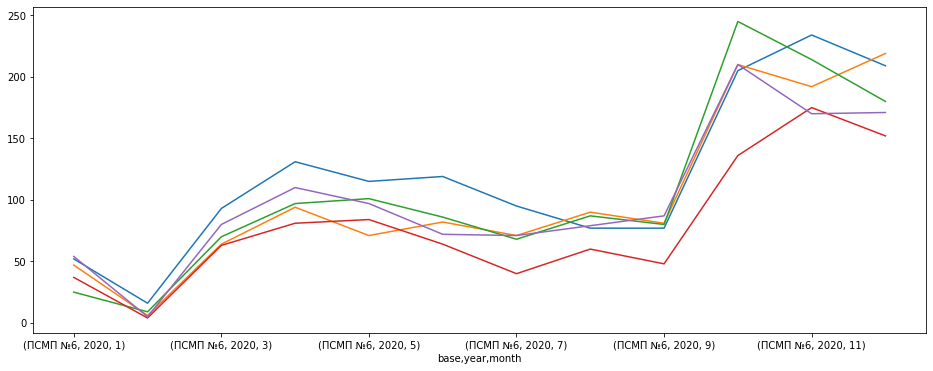

In [422]:
plt.figure(figsize=(16, 6))
all_data[(all_data.base=='ПСМП №3') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['nomer'].count().plot()
all_data[(all_data.base=='ПСМП №7') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['nomer'].count().plot()
all_data[(all_data.base=='ПСМП №5') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['nomer'].count().plot()
all_data[(all_data.base=='ПСМП №1') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['nomer'].count().plot()
all_data[(all_data.base=='ПСМП №6') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['nomer'].count().plot()

<AxesSubplot:title={'center':'по дням'}, xlabel='base,dt'>

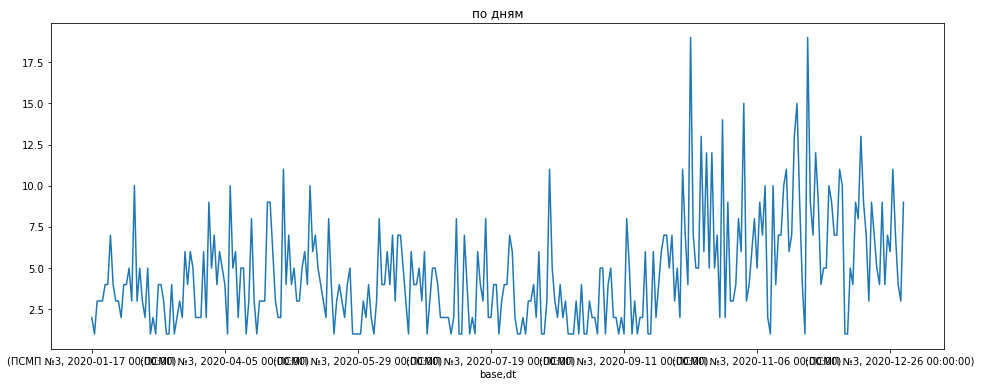

In [425]:
plt.figure(figsize=(16, 6))
all_data[(all_data.base=='ПСМП №3') & (all_data.year==2020)].groupby(['base' ,'dt'])['nomer'].count().plot(title="по дням")

In [190]:
all_data[all_data.year != 2022].groupby(['month'])['nomer'].count().sort_values(ascending=False) # Вызовы по месяцам

month
10    3910
11    3578
12    3310
6     2404
7     2103
9     2096
5     1986
4     1979
3     1979
8     1831
1     1703
2     1377
Name: nomer, dtype: int64

In [312]:
all_data.groupby(['base'])['nomer'].count().sort_values(ascending=False) # Вызовы по ПСМП 

base
ПСМП №3                           3772
ПСМП №7                           3310
ПСМП №5                           3035
ПСМП №1                           2947
ПСМП №6                           2942
ПСМП №9                           2594
ПСМП №4                           2378
ПСМП №2                           1952
ПСМП №8                           1950
Подстанция                        1932
Кстовская ЦРБ                     1278
Володарская ЦРБ                   1093
Арзамасская РБ                     859
Володарская ЦРБ Ильиногорская      685
БСМП г. Арзамас                    631
Борская ЦРБ                        568
БСМП г. Дзержинск Центральная      548
Выксунская ЦРБ                     399
Павловская ЦРБ                     381
Лысковская ЦРБ                     363
Перевозская ЦРБ                    358
Семеновская ЦРБ                    305
Кулебакская ЦРБ                    224
Пильнинская ЦРБ                    142
Сергачская ЦРБ                     140
Первомайская ЦРБ    

In [274]:
all_data.groupby(['dt'])['nomer'].count().rolling(3).mean() # Скользащее среднее

dt
2020-01-01          NaN
2020-01-02          NaN
2020-01-04     1.666667
2020-01-05     1.666667
2020-01-06     1.666667
                ...    
2022-05-20    52.333333
2022-05-21    50.000000
2022-05-22    47.666667
2022-05-23    50.333333
2022-05-24    46.000000
Name: nomer, Length: 813, dtype: float64

In [ ]:
Погода

In [282]:
# open weather
weather_2020 = pd.read_csv('./weather_data/27553.01.01.2020.31.12.2020.1.0.0.en.utf8.00000000.csv', skiprows=6, sep=';')
weather_2021 = pd.read_csv('./weather_data/27553.01.01.2021.31.12.2021.1.0.0.en.utf8.00000000.csv', skiprows=6, sep=';')
weather_2022 = pd.read_csv('./weather_data/27553.01.01.2022.31.05.2022.1.0.0.en.utf8.00000000.csv', skiprows=6, sep=';')

weather_2020.head(2)

,Local time in Nizhny Novgorod (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
31.12.2020 21:00,-4.0,761.6,769.2,NaN,90,Wind blowing from the south-southeast,3,4.0,7.0,100%.,State of sky on the whole unchanged. Diameter...,Rain.,Cloud covering more than 1/2 of the sky throug...,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,100%.,300-600,NaN,NaN,10.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.12.2020 18:00,-3.6,761.7,769.3,NaN,92,Wind blowing from the south-southeast,3,6.0,7.0,100%.,State of sky on the whole unchanged. Diameter...,Rain.,Cloud covering more than 1/2 of the sky throug...,NaN,-3.6,Stratocumulus other than Stratocumulus cumulog...,100%.,300-600,NaN,NaN,10.0,-4.7,1.0,12.0,NaN,NaN,NaN,NaN,NaN


In [433]:
weather_2020['dt'] = pd.to_datetime(weather_2020.index)
weather_2021['dt'] = pd.to_datetime(weather_2021.index)
weather_2022['dt'] = pd.to_datetime(weather_2022.index)
max_temp_by_day_2020 = weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max()
max_temp_by_day_2021 = weather_2021.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max()
max_temp_by_day_2022 = weather_2022.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max()

In [438]:
weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max() - weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].min()
weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].std()

dt
2020-01-01    5.7
2020-01-02    2.2
2020-01-03    9.4
2020-01-04    6.8
2020-01-05    7.0
             ... 
2020-12-27    3.1
2020-12-28    6.5
2020-12-29    2.7
2020-12-30    4.4
2020-12-31    3.1
Name: Local time in Nizhny Novgorod (airport), Length: 366, dtype: float64

In [ ]:
max_temp_by_day_2020.rename('MaxTemp', inplace=True)
max_temp_by_day_2021.rename('MaxTemp', inplace=True)
max_temp_by_day_2022.rename('MaxTemp', inplace=True)
;

In [285]:
max_temp_by_day = pd.concat([max_temp_by_day_2020, max_temp_by_day_2021, max_temp_by_day_2022])

In [287]:
all_data.set_index('dt').join(max_temp_by_day).reset_index() #

,dt,nomer,age,reson,address,porod,type,type.1,diag,result,move,base,first,last,nomer1,nomer2,time_exp,hour,address1,address2,address3,month,week,dayofweek,date_time,holiday,year,MaxTemp
0,2020-01-01,16(16),68.0,"больной или пострадавший,","""г.Нижний Новгород, ш. Казанское, д.9, кв***"",",Болит живот (взрослый),Первичный,неотложное состояние,Люмбалгия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,10:56:00,10:58:00,16.0,16.0,0 days 00:02:00,10,г,Нижний,NaN,1,1,2,2020-01-01 10:56:00,Новый год,2020,0.7
1,2020-01-01,29(29),79.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Богдановича, д.1, кв.*...",Болит живот (взрослый),Первичный,неотложное состояние,Гастрит,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,13:54:00,14:08:00,29.0,29.0,0 days 00:14:00,13,г,Нижний,"Богдановича, д.1, кв.***"",",1,1,2,2020-01-01 13:54:00,Новый год,2020,0.7
2,2020-01-01,52(52),11.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Героя Быкова, д.9, к***"",","""Температура 38-39","других жалоб нет""",Первичный,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"""ГБУЗ НО """"Детская городская поликлиника №48""""...",ПСМП №7,17:34:00,17:45:00,52.0,52.0,0 days 00:11:00,17,г,Нижний,"Героя Быкова, д.9, к***"",",1,1,2,2020-01-01 17:34:00,Новый год,2020,0.7
3,2020-01-02,113(113),83.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Родионова, д.165, корп...",Задыхается (нарушение сердечного ритма),Первичный,внезапное заболевание,Гипертоническая болезнь,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Тур...",ПСМП №7,06:52:00,07:07:00,113.0,113.0,0 days 00:15:00,6,г,Нижний,"Родионова, д.165, корп.8, кв***"",",1,1,3,2020-01-02 06:52:00,Новый год,2020,-0.3
4,2020-01-04,368(109),81.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Надежды Сусловой, д.3,...","""Боль в груди (колющая",Вызов,Вид,Дисциркуляторная энцефалопатия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №30"""" (ул. Ад...",ПСМП №7,03:08:00,03:23:00,368.0,109.0,0 days 00:15:00,3,г,Нижний,"Надежды Сусловой, д.3, корп.2, к***"",",1,1,5,2020-01-04 03:08:00,Новый год,2020,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35366,2022-05-24,30547(187),75.0,"больной или пострадавший,","""г.Дзержинск, б-р. Космонавтов, д.1/77, кв.***"",",Повышение ад без признаков криза,Первичный,неотложное состояние,Эссенциальная гипертензия (первичная),"""оказана помощь, больной оставлен на месте"",","""Поликлиника №2 Городская больница №2",Подстанция,00:40:00,00:45:00,30547.0,187.0,0 days 00:05:00,0,г,"Дзержинск,",NaN,5,21,1,2022-05-24 00:40:00,None,2022,3.1
35367,2022-05-24,6025(4),78.0,"""родственник, проживающий отдельно"",","""с.Трофимово, ул. М.Горького, д.89"",","""Задыхается",Вызов,Вид,Бронхиальная астма,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Лысковская центральная районная бол...",Лысковская ЦРБ,11:08:00,11:13:00,6025.0,4.0,0 days 00:05:00,11,с,"Трофимово,","М.Горького, д.89"",",5,21,1,2022-05-24 11:08:00,None,2022,3.1
35368,2022-05-24,14400(5),64.0,"больной или пострадавший,","""с.Большая Ельня, ул. Школьная, д.11"",","""Боль в груди (удушье",Вызов,Вид,Гипертоническая болезнь,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Кстовская центральная районная боль...",Кстовская ЦРБ,08:51:00,09:16:00,14400.0,5.0,0 days 00:25:00,8,с,Большая,"Школьная, д.11"",",5,21,1,2022-05-24 08:51:00,None,2022,3.1
35369,2022-05-24,4623(23),64.0,"больной или пострадавший,","""с.Чернуха, ул. Ленина, д.182, кв***"",",Повышение ад без признаков криза,Первичный,неотложное состояние,Артериальная гипертензия,"""оказана помощь, больной оставлен на месте"",",Арзамасская районная больница «ЧУБ»,Арзамасская РБ,00:05:00,00:10:00,4623.0,23.0,0 days 00:05:00,0,с,"Чер

NaN's

In [308]:
# check nan's # Почти нету
for column in all_data.columns:
    if all_data[column].isnull().values.any():
        print(f'{column} has nan values')

age has nan values
last has nan values
nomer1 has nan values
nomer2 has nan values
time_exp has nan values
address3 has nan values
holiday has nan values


In [311]:
sum(all_data['age'].isna()) # Заменить на среднее?

17

In [ ]:
geocoder api - находит улицу, но не дом и работает не совсеми, иногда выдает что-то находящееся очень далеко,
села в большинстве не находит

In [395]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="eda_fe")
all_data['address_for_geo'] = all_data['address'].str.split(',').str[:2].str.join('').str[3:]

In [394]:
# address_string = all_data.loc[76, 'address_for_geo']
address_string = 'Чернуха ул. Ленина'

location = geolocator.geocode(address_string)
print(location.address)
print((location.latitude, location.longitude))

улица Ленина, Чернуха, Чернухинский сельсовет, Арзамасский район, Нижегородская область, Приволжский федеральный округ, 607210, Россия
(55.5971229, 43.7509914)


In [398]:
all_data.loc[76, 'address_for_geo']

'Нижний Новгород ул. Космическая'